# Dataset Creation

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
num_rows = random.randint(60000, 70000)

In [4]:
ages = list(range(18, 31))
genders = ['Male', 'Female', 'Other']
recent_past_grades = [round(x, 1) for x in np.arange(5.0, 10.1, 0.1)]
attendances = ['85-95%', '75-85%', '65-75%', '55-65%', 'Below 55%']
attention_levels = list(range(1, 6))
stress_levels = list(range(1, 6))
sleep_hours = [round(x, 1) for x in np.arange(3.0, 9.1, 0.1)]
sleep_qualities = list(range(1, 6))
motivation_scores = list(range(1, 6))
social_supports = list(range(1, 6))
screen_times = [round(x, 1) for x in np.arange(1.0, 12.1, 0.1)]
family_incomes = list(range(5000, 200001, 5000))
parental_involvements = list(range(1, 6))
household_sizes = list(range(1, 11))
study_env_ratings = list(range(1, 6))
part_time_jobs = [0, 1]
physical_activity_days = list(range(0, 8))
commute_times = [round(x, 1) for x in np.arange(0.0, 3.1, 0.1)]
room_sharing_opts = [0, 1]

In [5]:
data = []
for _ in range(num_rows):
    age = random.choice(ages)
    gender = random.choice(genders)
    recent_grade = random.choice(recent_past_grades)
    attendance = random.choice(attendances)
    attention = random.choice(attention_levels)
    stress = random.choice(stress_levels)
    sleep_hr = random.choice(sleep_hours)
    sleep_quality = random.choice(sleep_qualities)
    motivation = random.choice(motivation_scores)
    social_support = random.choice(social_supports)
    screen_time = random.choice(screen_times)
    family_income = random.choice(family_incomes)
    parental_involvement = random.choice(parental_involvements)
    household_size = random.choice(household_sizes)
    study_env = random.choice(study_env_ratings)
    part_time = random.choice(part_time_jobs)
    physical_days = random.choice(physical_activity_days)
    commute_time = random.choice(commute_times)
    room_sharing = random.choice(room_sharing_opts)
    
    sgpa = (
        0.4 * recent_grade +
        0.3 * motivation +
        0.3 * study_env +
        0.2 * sleep_quality +
        0.25 * attention +
        0.1 * parental_involvement -
        0.2 * stress -
        0.05 * screen_time -
        0.1 * commute_time -
        (0.2 if room_sharing == 1 else 0) -
        (0.5 if attendance in ['65-75%', '55-65%', 'Below 55%'] else 0) +
        random.uniform(-0.2, 0.2)
    )
    sgpa = max(4.0, min(round(sgpa, 2), 10.0))
    
    data.append([
        age, gender, recent_grade, attendance, attention, stress, sleep_hr,
        sleep_quality, motivation, social_support, screen_time, family_income,
        parental_involvement, household_size, study_env, part_time, physical_days,
        commute_time, room_sharing, sgpa
    ])

In [6]:
columns = [
    "age", "gender", "recent_past_grades", "attendance", "attention_lectures", 
    "stress_level", "sleep_hours", "sleep_quality", "motivation_score", 
    "social_support", "screen_time", "family_income", "parental_involvement", 
    "household_size", "study_environment_rating", "part_time_job", 
    "physical_activity_days", "commute_time", "room_sharing", "sgpa"
]
df = pd.DataFrame(data, columns=columns)

In [7]:
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,screen_time,family_income,parental_involvement,household_size,study_environment_rating,part_time_job,physical_activity_days,commute_time,room_sharing,sgpa
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,8.5,140000,1,1,1,0,3,1.6,0,4.32
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,10.7,55000,4,6,3,0,3,3.0,1,5.87
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,2.5,125000,1,9,3,1,3,2.2,0,4.90
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,5.7,115000,2,5,1,0,3,0.5,1,4.00
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,4.4,25000,2,10,3,0,7,1.2,1,5.47


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61824 entries, 0 to 61823
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       61824 non-null  int64  
 1   gender                    61824 non-null  object 
 2   recent_past_grades        61824 non-null  float64
 3   attendance                61824 non-null  object 
 4   attention_lectures        61824 non-null  int64  
 5   stress_level              61824 non-null  int64  
 6   sleep_hours               61824 non-null  float64
 7   sleep_quality             61824 non-null  int64  
 8   motivation_score          61824 non-null  int64  
 9   social_support            61824 non-null  int64  
 10  screen_time               61824 non-null  float64
 11  family_income             61824 non-null  int64  
 12  parental_involvement      61824 non-null  int64  
 13  household_size            61824 non-null  int64  
 14  study_

In [9]:
high_sgpa = df[df["sgpa"] > 8.0]
high_sgpa.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,screen_time,family_income,parental_involvement,household_size,study_environment_rating,part_time_job,physical_activity_days,commute_time,room_sharing,sgpa
2062,21,Other,9.2,85-95%,5,2,8.0,5,5,2,5.8,65000,2,8,5,1,0,1.5,0,8.20
2507,25,Female,9.8,85-95%,5,1,3.0,4,4,5,4.2,60000,5,5,3,1,7,1.3,0,8.04
2630,18,Other,9.3,85-95%,3,2,8.0,5,5,5,2.9,115000,4,1,5,0,6,0.3,0,8.15
4484,28,Female,9.4,65-75%,5,2,9.0,5,5,4,3.5,170000,5,10,5,1,0,0.3,0,8.49
5258,19,Male,8.2,75-85%,4,1,9.0,5,5,1,5.3,70000,4,8,5,1,1,1.9,1,8.02


In [10]:
len(high_sgpa)

70

### Adding more high sgpa records

In [11]:
random.seed(101)
np.random.seed(101)

extra_rows = random.randint(4000, 5000)

high_performers = []

attendance_categories = ['85-95%', '75-85%']

In [12]:
for _ in range(extra_rows):
    recent_past_grades = round(random.uniform(8.0, 10.0), 2)
    motivation_score = random.randint(4, 5)
    study_environment_rating = random.randint(4, 5)
    sleep_quality = random.randint(4, 5)
    attention_lectures = random.randint(4, 5)
    parental_involvement = random.randint(3, 5)
    stress_level = random.randint(1, 2)
    screen_time = round(random.uniform(1.0, 4.0), 2)
    commute_time = round(random.uniform(0.0, 1.0), 2)
    room_sharing = 0
    attendance = random.choice(attendance_categories)

    sgpa = (
        0.4 * recent_past_grades
        + 0.3 * motivation_score
        + 0.3 * study_environment_rating
        + 0.2 * sleep_quality
        + 0.25 * attention_lectures
        + 0.1 * parental_involvement
        - 0.2 * stress_level
        - 0.05 * screen_time
        - 0.1 * commute_time
        - (0.2 if room_sharing == 1 else 0)
        - (0.5 if attendance in ['65-75%', '55-65%', 'Below 55%'] else 0)
        + random.uniform(-0.1, 0.1)
    )

    sgpa = min(max(round(sgpa, 2), 4.0), 10.0)

    high_performers.append({
        "age": random.randint(18, 25),
        "gender": random.choice(["Male", "Female", "Other"]),
        "recent_past_grades": recent_past_grades,
        "attendance": attendance,
        "attention_lectures": attention_lectures,
        "stress_level": stress_level,
        "sleep_hours": round(random.uniform(6.5, 9.0), 1),
        "sleep_quality": sleep_quality,
        "motivation_score": motivation_score,
        "social_support": random.randint(3, 5),
        "screen_time": screen_time,
        "family_income": random.randint(50000, 200000),
        "parental_involvement": parental_involvement,
        "household_size": random.randint(2, 6),
        "study_environment_rating": study_environment_rating,
        "part_time_job": 0,
        "physical_activity_days": random.randint(2, 6),
        "commute_time": commute_time,
        "room_sharing": room_sharing,
        "sgpa": sgpa
    })


In [13]:
df_high = pd.DataFrame(high_performers)

df_combined = pd.concat([df, df_high], ignore_index=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66419 entries, 0 to 66418
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       66419 non-null  int64  
 1   gender                    66419 non-null  object 
 2   recent_past_grades        66419 non-null  float64
 3   attendance                66419 non-null  object 
 4   attention_lectures        66419 non-null  int64  
 5   stress_level              66419 non-null  int64  
 6   sleep_hours               66419 non-null  float64
 7   sleep_quality             66419 non-null  int64  
 8   motivation_score          66419 non-null  int64  
 9   social_support            66419 non-null  int64  
 10  screen_time               66419 non-null  float64
 11  family_income             66419 non-null  int64  
 12  parental_involvement      66419 non-null  int64  
 13  household_size            66419 non-null  int64  
 14  study_

In [14]:
h_sgpa = df_combined[df_combined["sgpa"] > 9.0]
len(h_sgpa)

90

In [ ]:
# df_combined.to_csv("data/student_performance_dataset.csv", index=False)

## Visualizing the dataset

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

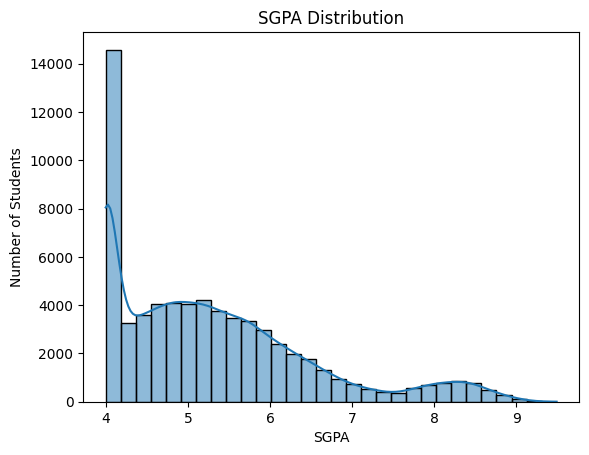

In [17]:
sns.histplot(df_combined['sgpa'], bins=30, kde=True)
plt.title("SGPA Distribution")
plt.xlabel("SGPA")
plt.ylabel("Number of Students")
plt.show()

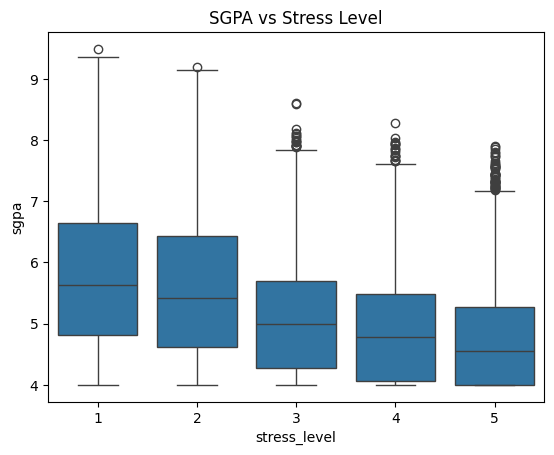

In [18]:
sns.boxplot(x="stress_level", y="sgpa", data=df_combined)
plt.title("SGPA vs Stress Level")
plt.show()

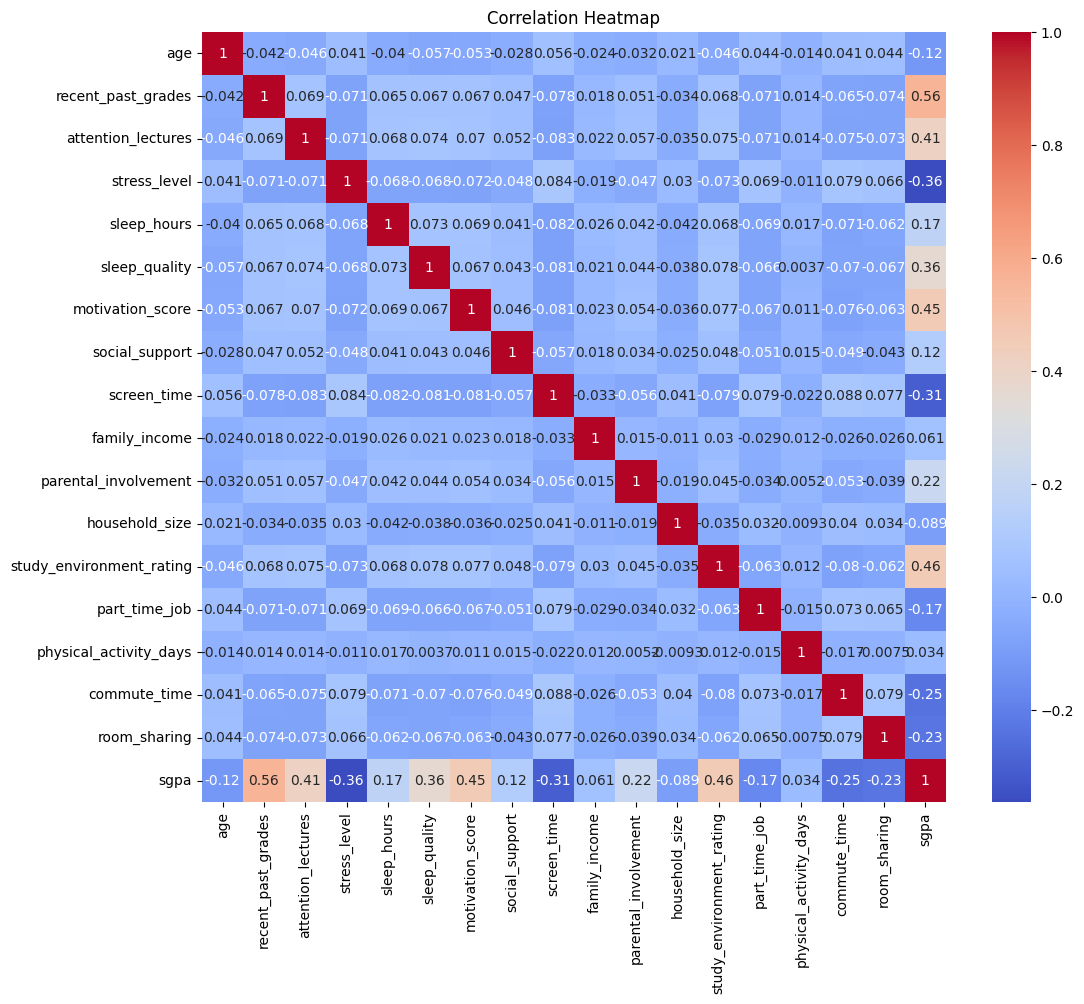

In [19]:
numeric_df = df_combined.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

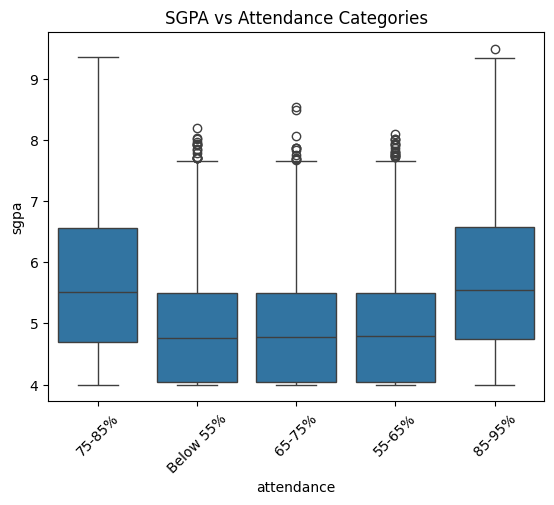

In [20]:
sns.boxplot(x="attendance", y="sgpa", data=df_combined)
plt.title("SGPA vs Attendance Categories")
plt.xticks(rotation=45)
plt.show()